## 例題 数値積分 中点則
合成中点則を用いて、積分$\int_{0}^{1}e^{-x}dx$を数値積分を行う。  
また、刻み幅を変えて精度と計算時間の変化を確認する。  


## 実装例  
以下に実装したコード例を示す。

In [2]:
import numpy as np

# 被積分関数の実装
def func(x):
    return np.exp(-x)

# 中点則合成則の実装
def midpoint(func, a, b, n):
    h = (b - a)/n
    ans = 0
    for i in range(n):
        xi = a + h * (2*i + 1) / 2
        ans = ans + func(xi) * h
    return ans

これらを用いて誤差評価を行ってみる。例えば、解析解$1-e^{-1}$を用いと、

n=1e+00 t=1.10e-05s, S=6.07e-01, e=4.048e-02
n=1e+02 t=1.32e-04s, S=6.32e-01, e=4.167e-06
n=1e+04 t=1.26e-02s, S=6.32e-01, e=4.167e-10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


n=1e+06 t=5.94e-01s, S=6.32e-01, e=3.284e-14


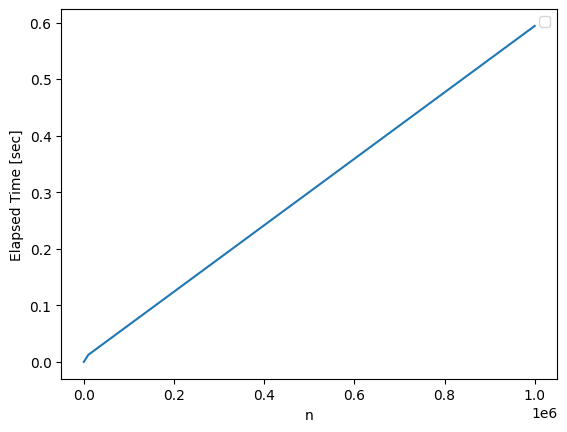

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


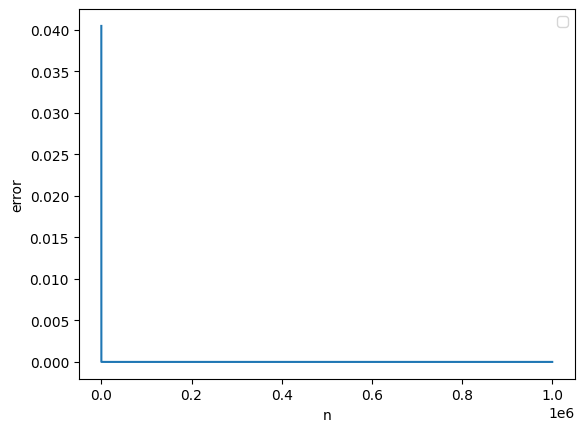

In [7]:
import time
import matplotlib.pyplot as plt

I = 1 - np.exp(-1)      # 解析解

n_list = []
t_list = []
e_list = []
for n in [10**i for i in range(0,7,2)]:
    t1 = time.time()
    S = midpoint(func, 0, 1, n)
    error = abs((S - I)/I)    # 相対誤差
    t2 = time.time()
    elapsed_time = t2 - t1

    n_list.append(n)
    t_list.append(elapsed_time)
    e_list.append(error)

    txt = "n={0:.0e} t={1:.2e}s, S={2:.2e}, e={3:.3e}".format(n, elapsed_time, S, error)
    print(txt)

plt.plot(n_list, t_list)
plt.xlabel("n")
plt.ylabel("Elapsed Time [sec]")
plt.legend()
plt.show()

plt.plot(n_list, e_list)
plt.xlabel("n")
plt.ylabel("error")
plt.legend()
plt.show()